# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, we will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. we will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. we will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, we should start by asking questions we might want to understand about the bike share data. Consider, for example, if you were working for Motivate.<br>
What kinds of information would you want to know about in order to make smarter business decisions?<br>
If you were a user of the bike-share service, what factors might influence how you would want to use the service?

#### Questions to be investigated
* How long the avarge user use the bike for ?
* Which one of the cities has more active users ?
* How long distance the averge user drive the bike for ?


<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)


In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## Use the csv library to set up a DictReader object. ##
        trip_reader = csv.DictReader(f_in)
        
        ## Use a function on the DictReader object to read the  ##
        ## first trip from the data file and store it in a variable.     ##
        first_trip = next(trip_reader)
        
        ## Use the pprint library to print the first trip. ##

        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip



City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar


<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

we will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.



In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) a'tripduration'nd returns the trip duration in units of minutes.
    """
    if city == 'Washington':
        duration = int(datum['Duration (ms)']) / 60000
    else: 
        duration = int(datum['tripduration']) / 60
        
    return round(duration, 3) 


# Some tests to check that your code works. There should be no output if all of
# the assertions pass.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [21]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    """
     
    if city == "Washington":
        my_date = datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M")
    elif city == 'NYC':
        my_date = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S")
    elif city == 'Chicago':
        my_date = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M")
    
    month = my_date.month
    hour = my_date.hour
    day_of_week = my_date.strftime("%A")
     
    return (month, hour, day_of_week)

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. 
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    """
     
    if city == "Washington":
        if datum["Member Type"] == "Registered":
            user_type = "Subscriber"
        elif datum["Member Type"] == "Casual":
            user_type = "Customer"
    else:
        user_type = datum["usertype"]
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
            point_duration = duration_in_mins(row, city)
            point_month, point_hour, point_day_of_week = time_of_trip(row, city)
            point_user_type = type_of_user(row, city)
            
            new_point = {
                'duration': point_duration,
                'month': point_month,
                'hour': point_hour,
                'day_of_week': point_day_of_week,
                'user_type': point_user_type}

            ## write the processed information to the output file. ##
            trip_writer.writerow(new_point)
            

In [7]:
# testing the code
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])



<a id='eda'></a>
## Exploratory Data Analysis

Now that we have the data collected and wrangled, we're ready to start exploring the data. In this section we will write some code to compute descriptive statistics from the data. we will also be using the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers.

**Question**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has the highest number trips (276798 trips), NYC city has the highest proportion of trips made by subscribers (%88.84), Chicago has the highest proportion of trips made by short-term customers (%23.77)
            

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
data_files = {'Washington': './data/Washington-2016-Summary.csv',
              'Chicago': './data/Chicago-2016-Summary.csv',
              'NYC': './data/NYC-2016-Summary.csv'}
data_info = {}

for city, file in data_files.items():
    n_subscribers, n_customers, n_total = number_of_trips(file)
    p_subscribers = round((n_subscribers / n_total) * 100, 2)
    p_customers = round((n_customers / n_total) * 100 , 2)
    
    data_info[city] = {'n_subscribers':n_subscribers,
                     'n_customers': n_customers,
                     'n_total': n_total,
                     'p_subscribers': p_subscribers,
                     'p_customers': p_customers}
    
# print all iformation
for city, info in data_info.items():
    print(city , "\n",
          'total trips : ' ,  info['n_total'] , '\n' ,
          'number of subscribers : ' , info['n_subscribers'], '\n',
          'number of customers : ', info['n_customers'], '\n',
          'proportion of subscribers : %', info['p_subscribers'], '\n',
          'proportion of customers : %', info['p_customers'],'\n\n')
    
    
    

Washington 
 total trips :  66326 
 number of subscribers :  51753 
 number of customers :  14573 
 proportion of subscribers : % 78.03 
 proportion of customers : % 21.97 


Chicago 
 total trips :  72131 
 number of subscribers :  54982 
 number of customers :  17149 
 proportion of subscribers : % 76.23 
 proportion of customers : % 23.77 


NYC 
 total trips :  276798 
 number of subscribers :  245896 
 number of customers :  30902 
 proportion of subscribers : % 88.84 
 proportion of customers : % 11.16 





**Question**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: average trip length Chicago is 16.56 , NYC is 15.81 , Washington is 18.93. and the proportion of rides that takes over 30 minutes Chicago is 8.33 , NYC is 7.3 , Washington is 10.84.

In [23]:
##  The csv module reads in all of the data as strings, including  ##
## numeric values. we will need a function to convert the strings      ##
## into an appropriate numeric type before we aggregate data.          ##

def duration_of_trip(filename):
    
    with open(filename) as f_in:
        reader = csv.DictReader(f_in)
        
        #initialize count variables
        total_trips = 0
        total_trips_duration = 0
        trips_over_30 = 0
        
        for row in reader:
            # add this trip duration to total trips durations
            total_trips_duration += float(row['duration'])
            
            # count the trip to the total
            total_trips += 1
            
            # count if it is over 30 minutes
            if float(row['duration']) > 30:
                trips_over_30 += 1
        # compute the proportion of the trips over 30 minutes        
        p_over_30 = round((trips_over_30 / total_trips) * 100 , 2)
        
        # compute the total average trips
        avg_trips = round(total_trips_duration / total_trips, 2)
        
        return(p_over_30, avg_trips)
            

In [27]:
# printing the duration information
duration_info = {}
for city, file in data_files.items():
    p_over_30 , avg_trips = duration_of_trip(file)
    duration_info[city] = {'p of trips  over 30': p_over_30,
                           'average trips': avg_trips}
pprint(duration_info)    

{'Chicago': {'average trips': 16.56, 'p of trips  over 30': 8.33},
 'NYC': {'average trips': 15.81, 'p of trips  over 30': 7.3},
 'Washington': {'average trips': 18.93, 'p of trips  over 30': 10.84}}


**Question**: which type of user in NYC takes longer rides on average: Subscribers or Customers?

**Answer**:  average subscriber duration :  13.68 <br> 
             average customer duration :  32.78

In [28]:
# initialize count variables
total_subscriber_trips = 0
total_subscriber_duration = 0
total_customer_trips = 0
total_customer_duration = 0

# reading NYC city file
with open('./data/NYC-2016-Summary.csv') as f_in:
    reader = csv.DictReader(f_in)

    for row in reader:
        # check the type of user
        if row['user_type'] == 'Subscriber':
            #add trip's duration to subscriber's duration
            total_subscriber_duration += float(row['duration'])
            
            # count the trip 
            total_subscriber_trips += 1
        else:
            # add trip's duration to customer's duration
            total_customer_duration += float(row['duration'])
            #count the trip
            total_customer_trips += 1
            
    # compute averages for both 
    avg_subscriber_duration = round((total_subscriber_duration / total_subscriber_trips) , 2)
    avg_customer_duration = round((total_customer_duration / total_customer_trips) , 2)
    
# printing the information
print('average subscriber duration : ', avg_subscriber_duration,
      'average customer duration : ', avg_customer_duration)


average subscriber duration :  13.68 average customer duration :  32.78


<a id='visualizations'></a>
### Visualizations

The last set of values that we computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. we will now use these functions to create a histogram of the trip times for NYC.

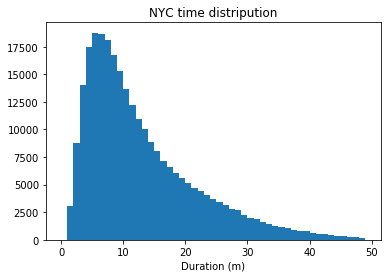

In [29]:
## collecting all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
with open('./data/NYC-2016-Summary.csv') as f_in:
    reader = csv.DictReader(f_in)
    
    trip_durations = []
    for row in reader:
        trip_durations.append(float(row['duration']))

plt.hist(trip_durations, range(0,50))
plt.title('NYC time distripution')
plt.xlabel('Duration (m)')
plt.show()



**Question**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in NYC. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. Set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: working with NYC <br>
            Subscribers peak : about 7 minutes <br>
            Subscribers shape : skewed to right <br>
            Customers peak : about 20 minutes <br>
            Subscribers shape : bell shaped
            

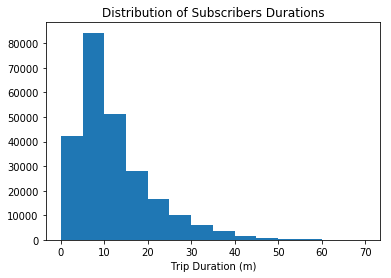

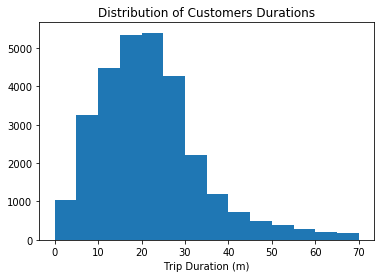

In [15]:
## Use open function to open the csv file. ##
with open('./data/NYC-2016-Summary.csv') as f_in:
    reader = csv.DictReader(f_in)
    
    # initialize count variables
    subscribers_durations = []
    customers_durations = []
    
    # read rows in the file
    for row in reader:
        # check the user type
        if row['user_type'] == 'Subscriber':
            subscribers_durations.append(float(row['duration']))           
        else:
            customers_durations.append(float(row['duration']))
            
# visualize histogram of subscribers duration        
plt.hist(subscribers_durations, bins = [n for n in range(0, 75, 5)], range =(0,75))
plt.title('Distribution of Subscribers Durations')
plt.xlabel('Trip Duration (m)')
plt.show()

# visualize histogram of customers duration   
plt.hist(customers_durations, bins = [n for n in range(0, 75, 5)], range =(0,75))
plt.title('Distribution of Customers Durations')
plt.xlabel('Trip Duration (m)')
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, we've performed an initial exploration into the data available. we have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For NYC, we have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. 

**Question**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Our investigation should involve at least two variables and should compare at least two groups. We should also use at least one visualization as part of your explorations.

**Answer**: Working with Washington city.<br>
During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?
answer : <br>
Considering all trips it is clear there is a peak on around 8:00 and also another peak on 17:00 . <br>
If we take Subscribers trips we see that there is a peak on 8:00 and 17:00 and the reason it similer to total trips because %78.03 (solved earlier) of trips done by Subscribers (I guess many Subscribers rely on Bicycle-sharing systems to go to work and come back). <br>
If we take Customers trips we see the peak from 12:00 to 17:00. <br>

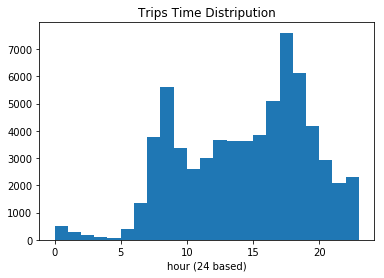

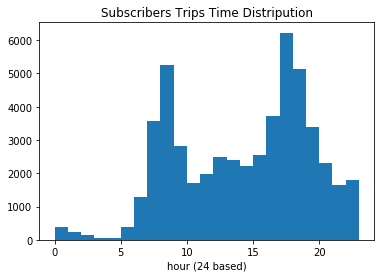

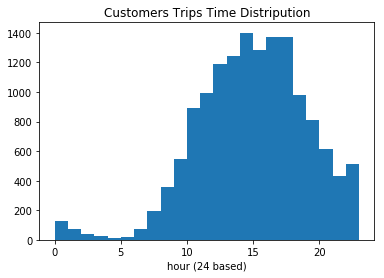

In [30]:
#initialize count variables
subscriber_renting_time = []
customer_renting_time = []

with open('./data/Washington-2016-Summary.csv') as f_in:
    reader = csv.DictReader(f_in)
    
    # read rows of the file
    for row in reader:
        # check the user type
        if row['user_type'] == 'Subscriber':
            subscriber_renting_time.append(float(row['hour']))
        else:
            customer_renting_time.append(float(row['hour']))
            
# visualize histogram of all users renting time   
plt.hist((subscriber_renting_time + customer_renting_time) , bins = range(0,24))
plt.title('Trips Time Distripution')
plt.xlabel('hour (24 based)')
plt.show()

# visualize histogram of subscribers renting time 
plt.hist(subscriber_renting_time, bins = range(0,24))
plt.title('Subscribers Trips Time Distripution')
plt.xlabel('hour (24 based)')
plt.show() 

# visualize histogram of customers renting time 
plt.hist(customer_renting_time, bins = range(0,24))
plt.title('Customers Trips Time Distripution')
plt.xlabel('hour (24 based)')
plt.show() 

<a id='conclusions'></a>
## Conclusions

This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, we might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])


0